# Experiemento Rafael


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [2]:
## leitura e Tratamento dos dados
df_original = pd.read_csv("../../data/dados_extraidos.csv")

In [3]:
## carrega os dados
df = df_original.copy()

In [4]:
## pre-processamento 1 - fillna with median
# Calculo das médias do df 
medians = df.median()
# Fill NaN values with medians
df = df.fillna(medians)

display(df.head())

,timestamp,vol1ex1_qx,vol1ex1_qy,vol1ex1_qz,vol1ex1_jx,vol1ex1_jy,vol1ex1_jz,vol1ex2_qx,vol1ex2_qy,vol1ex2_qz,...,vol7ex4_qz,vol7ex4_jx,vol7ex4_jy,vol7ex4_jz,vol7ex5_qx,vol7ex5_qy,vol7ex5_qz,vol7ex5_jx,vol7ex5_jy,vol7ex5_jz
0,0.0000,0.71875,102.9769,91.90424,186.9064,86.05160,198.7182,0.71875,101.1554,100.2091,...,308.6826,277.2512,219.5107,316.9044,-47.8125,131.6766,283.0572,264.6223,219.5107,316.9044
1,0.0334,0.71875,102.9769,91.90424,186.9064,86.05160,198.7182,2.71875,101.1554,100.2091,...,308.6826,277.2512,219.5107,316.9044,-47.8125,128.9778,278.6195,263.2088,219.5107,316.9044
2,0.0668,-0.25000,102.9769,91.90424,186.9064,86.24536,198.8709,2.71875,101.1554,100.2091,...,308.6826,277.2512,219.5107,316.9044,-47.8125,128.9778,278.6195,263.2088,219.5107,316.9044
3,0.1002,-0.25000,102.9769,91.90424,186.9064,85.88944,199.3856,2.71875,101.1554,100.2091,...,308.6826,277.2512,219.5107,316.9044,-47.8125,128.8790,278.7604,263.1512,219.5107,316.9044
4,0.1336,0.40625,102.9769,91.90424,186.9064,85.88944,199.3856,2.50000,101.1554,100.2091,...,308.6826,277.2512,219.5107,316.9044,-47.8125,128.8790,278.7604,263.1512,219.5107,316.9044


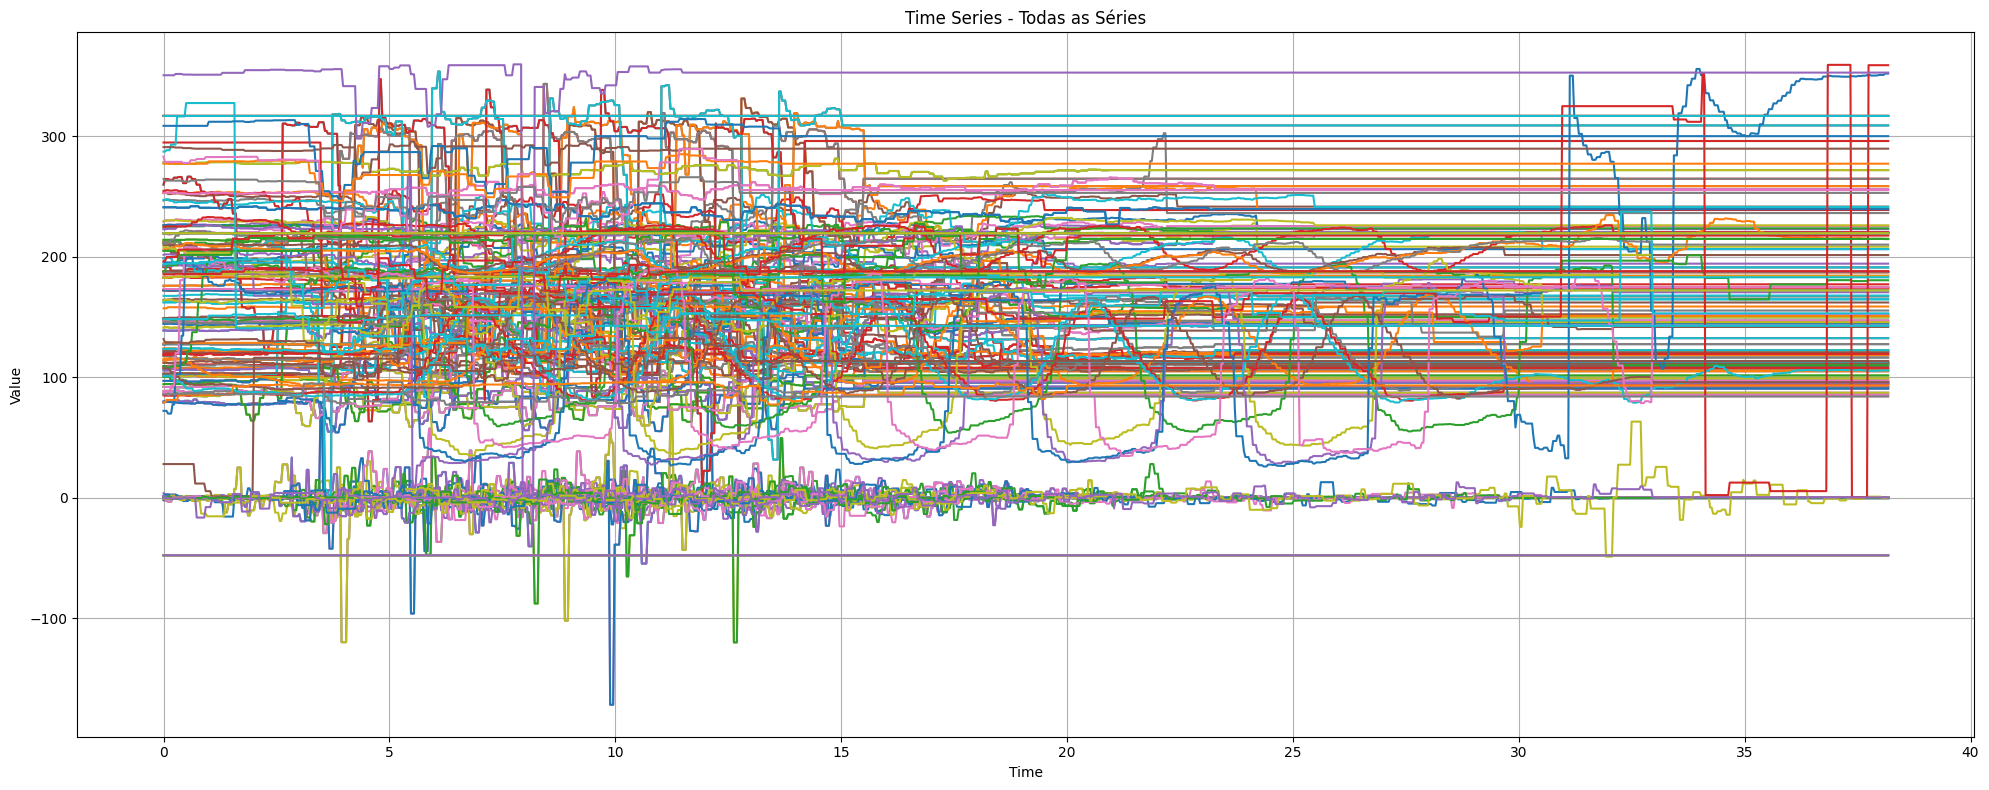

In [5]:
# visualização das séries pós processamento dos dados
plt.figure(figsize=(20, 8))

for col in df.columns[1:]:
    # Ensure the data is numeric before plotting
    df[col] = pd.to_numeric(df[col], errors='coerce')
    plt.plot(df.iloc[:,0], df[col], label=col)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series - Todas as Séries')
# plt.legend() # Remove legend
plt.grid(True)
plt.tight_layout()
plt.show() 

In [6]:
"""
suavização de cada série com média móvel
suavização de cada série com Locally Estimated Scatterplot Smoothing - LOESS (https://pypi.org/project/loess/)
"""



'\nsuavização de cada série com média móvel\nsuavização de cada série com Locally Estimated Scatterplot Smoothing - LOESS (https://pypi.org/project/loess/)\n'

In [7]:
import warnings
warnings.filterwarnings('ignore')
## Suavização de cada série com média móvel (janela = 3)
window_size = 3

# Criar novo DataFrame para dados suavizados
df_smoothed_ma = pd.DataFrame()
df_smoothed_ma['timestamp'] = df['timestamp']

# Aplicar média móvel para todas as colunas (exceto timestamp)
original_cols = [col for col in df.columns if col != 'timestamp']

print(f"Aplicando suavização com janela de tamanho {window_size}")
print(f"Processando {len(original_cols)} colunas...")

for i, col in enumerate(original_cols):
    df_smoothed_ma[col + '_smoothed_ma'] = df[col].rolling(window=window_size, min_periods=1).mean()

print("\nSuavização concluída!")
print(f"Dimensões do dataset suavizado: {df_smoothed_ma.shape}")

# Mostrar primeiras linhas
display(df_smoothed_ma.head(10))

Aplicando suavização com janela de tamanho 3
Processando 210 colunas...

Suavização concluída!
Dimensões do dataset suavizado: (1144, 211)


,timestamp,vol1ex1_qx_smoothed_ma,vol1ex1_qy_smoothed_ma,vol1ex1_qz_smoothed_ma,vol1ex1_jx_smoothed_ma,vol1ex1_jy_smoothed_ma,vol1ex1_jz_smoothed_ma,vol1ex2_qx_smoothed_ma,vol1ex2_qy_smoothed_ma,vol1ex2_qz_smoothed_ma,...,vol7ex4_qz_smoothed_ma,vol7ex4_jx_smoothed_ma,vol7ex4_jy_smoothed_ma,vol7ex4_jz_smoothed_ma,vol7ex5_qx_smoothed_ma,vol7ex5_qy_smoothed_ma,vol7ex5_qz_smoothed_ma,vol7ex5_jx_smoothed_ma,vol7ex5_jy_smoothed_ma,vol7ex5_jz_smoothed_ma
0,0.0000,0.718750,102.976900,91.90424,186.9064,86.051600,198.718200,0.718750,101.1554,100.20910,...,308.6826,277.2512,219.5107,316.9044,-47.8125,131.676600,283.057200,264.622300,219.5107,316.9044
1,0.0334,0.718750,102.976900,91.90424,186.9064,86.051600,198.718200,1.718750,101.1554,100.20910,...,308.6826,277.2512,219.5107,316.9044,-47.8125,130.327200,280.838350,263.915550,219.5107,316.9044
2,0.0668,0.395833,102.976900,91.90424,186.9064,86.116187,198.769100,2.052083,101.1554,100.20910,...,308.6826,277.2512,219.5107,316.9044,-47.8125,129.877400,280.098733,263.679967,219.5107,316.9044
3,0.1002,0.072917,102.976900,91.90424,186.9064,86.062133,198.991567,2.718750,101.1554,100.20910,...,308.6826,277.2512,219.5107,316.9044,-47.8125,128.944867,278.666467,263.189600,219.5107,316.9044
4,0.1336,-0.031250,102.976900,91.90424,186.9064,86.008080,199.214033,2.645833,101.1554,100.20910,...,308.6826,277.2512,219.5107,316.9044,-47.8125,128.911933,278.713433,263.170400,219.5107,316.9044
5,0.1670,0.187500,103.087633,91.79736,186.7762,85.889440,199.385600,2.572917,101.1854,99.24028,...,308.6826,277.2512,219.5107,316.9044,-47.8125,128.879000,278.760400,263.151200,219.5107,316.9044
6,0.2004,0.406250,103.198367,91.69048,186.6460,85.902233,198.147100,2.500000,101.2154,98.27146,...,308.6826,277.2512,219.5107,316.9044,-47.8125,128.879000,278.760400,263.151200,219.5107,316.9044
7,0.2338,0.427083,103.309100,91.58360,186.5158,85.915027,196.908600,2.500000,101.2454,97.30264,...,308.6826,277.2512,219.5107,316.9044,-47.8125,128.879000,278.760400,263.151200,219.5107,316.9044
8,0.2672,0.447917,103.309100,91.58360,186.5158,85.927820,195.670100,2.500000,101.2454,97.30264,...,308.6826,277.2512,219.5107,316.9044,-47.8125,128.879000,278.760400,263.151200,219.5107,316.9044
9,0.3006,0.468750,103.309100,91.58360,186.5158,85.922557,195.708000,2.229167,101.2454,97.30264,...,308.6826,277.2512,219.5107,316.9044,-47.8125,128.879000,278.760400,263.151200,219.5107,316.9044


In [18]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from loess.loess_1d import loess_1d
import logging

# Configurar logging básico
logging.basicConfig(level=logging.INFO, format='[%(levelname)s] %(message)s')

# Parâmetros do LOESS
frac = 0.1    # Fração de pontos para cada ajuste local (0.1 a 1.0)
degree = 1    # Grau do polinômio
npoints = None  # Número de pontos (None = automático)

# Lista de colunas originais (exceto timestamp)
original_cols = [col for col in df.columns if col != 'timestamp']

# Pré-alocar dicionário de resultados
smoothed_data = {'timestamp': df['timestamp']}
x_values = np.arange(len(df), dtype=float)

for i, col in enumerate(original_cols):
    try:
        y_values = df[col].values.astype(float)
        
        if np.isnan(y_values).all():
            smoothed_data[col + '_smoothed_loess'] = y_values
            continue
        
        valid_mask = ~np.isnan(y_values)
        n_valid = np.sum(valid_mask)

        if n_valid < 3:
            smoothed_data[col + '_smoothed_loess'] = y_values
            continue

        min_points_needed = max(3, int(n_valid * 0.1))
        local_frac = frac if n_valid * frac >= min_points_needed else min_points_needed / n_valid

        x_clean = x_values[valid_mask]
        y_clean = y_values[valid_mask]

        data_range = np.max(y_clean) - np.min(y_clean)
        data_std = np.std(y_clean)

        if data_range < 1e-10 or data_std < 1e-10:
            smoothed_data[col + '_smoothed_loess'] = y_values
            continue

        try:
            _, yout, _ = loess_1d(x_clean, y_clean, degree=degree, frac=local_frac, npoints=npoints)
        except Exception as loess_error:
            if "SVD did not converge" in str(loess_error):
                try:
                    alt_frac = min(0.8, local_frac + 0.3)
                    _, yout, _ = loess_1d(x_clean, y_clean, degree=1, frac=alt_frac, npoints=npoints)
                except:
                    window_size = max(3, int(len(y_clean) * 0.1))
                    yout = pd.Series(y_clean).rolling(window=window_size, center=True, min_periods=1).mean().values
            else:
                raise loess_error

        smoothed_series = np.full_like(y_values, np.nan, dtype=float)
        smoothed_series[valid_mask] = yout

        if np.isnan(smoothed_series).any():
            valid_smoothed = ~np.isnan(smoothed_series)
            if np.sum(valid_smoothed) > 1:
                smoothed_series = np.interp(x_values, x_values[valid_smoothed], smoothed_series[valid_smoothed])

        smoothed_data[col + '_smoothed_loess'] = smoothed_series

    except Exception as e:
        logging.error(f'Erro ao processar coluna {col}: {e}')
        smoothed_data[col + '_smoothed_loess'] = y_values

# Construir DataFrame final
df_smoothed_loess = pd.DataFrame(smoothed_data)

# Salvar resultado
output_filename = f'dataset_suavizado_loess_frac{frac}_deg{degree}.csv'
df_smoothed_loess.to_csv(output_filename, index=False)

# Verificação simples de séries mantidas
total_errors = sum(
    np.allclose(df[col].values, df_smoothed_loess[col + '_smoothed_loess'].values, equal_nan=True)
    for col in original_cols
)
total_processed = len(original_cols)
processing_success_rate = ((total_processed - total_errors) / total_processed) * 100

logging.info(f'Séries suavizadas: {total_processed - total_errors}/{total_processed} ({processing_success_rate:.1f}%)')
logging.info(f'Saída salva em: {output_filename}')


[INFO] Séries suavizadas: 195/210 (92.9%)
[INFO] Saída salva em: dataset_suavizado_loess_frac0.1_deg1.csv


In [8]:
## visualização das séries novamente depois dos preprocessamentos novos e escolhe uma

In [9]:
"""
seguir o notebook de exemplo notebooks\Legacy\01_angulos_por_voluntario\04_Joelho_todos.ipynb

plot joelho com todos os voluntário e trials (cor por voluntário)
plot quadril com todos os voluntário e trials (cor por voluntário)
"""
# fazer até aqui 

'\nseguir o notebook de exemplo notebooks\\Legacy\x01_angulos_por_voluntario\x04_Joelho_todos.ipynb\n\nplot joelho com todos os voluntário e trials (cor por voluntário)\nplot quadril com todos os voluntário e trials (cor por voluntário)\n'

In [10]:
# Clusterização hierárquica

In [11]:
"""
calcular uma matriz de distância entre as séries. Distâncias:
    - a distância vai ser: soma das distancias euclidiana das univariadas (dist joelho x + joelho y + joelho z + quadril x + quadril y + quadril z) 
        (entre duas trials, igualzinho o que vc já fez antes, só qeu agora considerando todas as variáveis (série temporal **multivariada**)
    - usa clusterização hierárquica aglomerativa (sklearn.cluster.AgglomerativeClustering)
    - escolhe um corte e visualiza os clusters
"""

'\ncalcular uma matriz de distância entre as séries. Distâncias:\n    - a distância vai ser: soma das distancias euclidiana das univariadas (dist joelho x + joelho y + joelho z + quadril x + quadril y + quadril z) \n        (entre duas trials, igualzinho o que vc já fez antes, só qeu agora considerando todas as variáveis (série temporal **multivariada**)\n    - usa clusterização hierárquica aglomerativa (sklearn.cluster.AgglomerativeClustering)\n    - escolhe um corte e visualiza os clusters\n'

In [12]:
# Clusterização k-means DTW
"""
- para n_clusters em [2, 10]:
    - clusteriza com o DTW
    - calcula métricas (silhouette score, inertia)
- analiza regra do cotovelo e escolhe um número de clusters
- visualiza clusters
"""

'\n- para n_clusters em [2, 10]:\n    - clusteriza com o DTW\n    - calcula métricas (silhouette score, inertia)\n- analiza regra do cotovelo e escolhe um número de clusters\n- visualiza clusters\n'

In [13]:
# Clusterização k-means CTW
"""
- para n_clusters em [2, 10]:
    - clusteriza com o CTW
    - calcula métricas (silhouette score, inertia)
- analiza regra do cotovelo e escolhe um número de clusters
- visualiza clusters
"""

'\n- para n_clusters em [2, 10]:\n    - clusteriza com o CTW\n    - calcula métricas (silhouette score, inertia)\n- analiza regra do cotovelo e escolhe um número de clusters\n- visualiza clusters\n'

In [14]:
# Análise dos resultados
"""
Compara o que vc obteve com 3 métodos acima.
"""

"""
Hipótese: Clusterizar séries temporais é útil para detectar padrões de compensação de movimento nos dados do BSN?
Pra responder:
- experimento comparando métodos de clusterização para encontrar o melhor deles.
- **analisar se a clusterização foi de fato útil ou não**.
"""

'\nHipótese: Clusterizar séries temporais é útil para detectar padrões de compensação de movimento nos dados do BSN?\nPra responder:\n- experimento comparando métodos de clusterização para encontrar o melhor deles.\n- **analisar se a clusterização foi de fato útil ou não**.\n'

In [15]:
# Conclusão